**PYTORCH WORKFLOW**

1. Go through the depp learning module on Github when in doubt
2. Learnpytorch.io

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
torch.__version__

'2.6.0+cu124'

1. Preparing and loading Data



* Excel spreadsheets
* images
* videos
.....etc.




**Linear regressions formula**<br>
Y = a+bX<br>
In the case below,<br>
a = bias<br>
b = weight<br>

In [ ]:
#Create Known parameters

weight = 0.7
bias = 0.3

#create

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
Y = weight * X + bias

X[:10], Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
 len(X), len(Y)

(50, 50)

Training and test set with the sample data

In [ ]:
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]
len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10,7))

  #plot data in red for train
  plt.scatter(train_data, train_labels, c="r", s=4, label="Train data")

  #plot data inblue for test
  plt.scatter(test_data, test_labels, c="b", s=4, label="Test data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="g", s=4, label="Predictions")

  #show legend
  plt.legend(prop={"size":14})


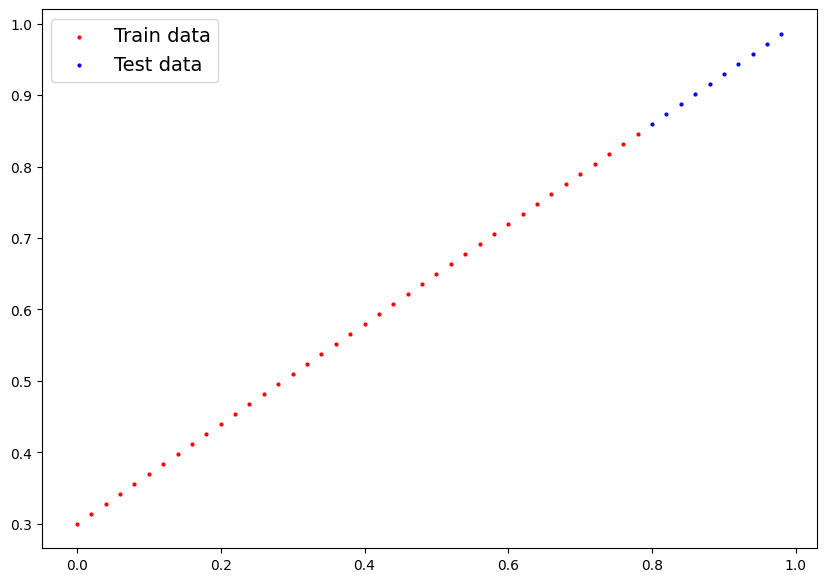

In [ ]:
plot_predictions();

## PYTORCH Model creation


What the model does:
* Start with random values - Weight and bias
* Look at the training data -- Adjust the random values to get better or closer to the ideal values.

How does it do it?
1. Gradient decend
2. Back propogation


In [ ]:
# creating a linear regression model
class LinearRegressionModel(nn.Module): #Everthing in pytorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))

  #Forward method to fdefine the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # x is the input data
    return self.weights * x + self.bias # LinearRegreesion formula --> Y = a+bX

## Pytorch model building essentials

* Computational graph (nodes and edges)
* torch.nn.Parameter -->What parameters should the model try and Learn
* torch.nn.Module --> Base class for all neural network modules
* torch.optim --> that optimises the values to better represent the data than being random
* def forward() --> use forward to all nn.Module subclasses

# Whats inside the model?

We can check whats inside the module with parameters and cheking the values with manual seed



In [ ]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

## Making predictions using torch.inference_mode()

Lets check how well it predicts Y_test, based on X_test.

When we pass the data through the model we use the forward method

In [ ]:
# Predicting a model

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

In [ ]:
Y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [ ]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

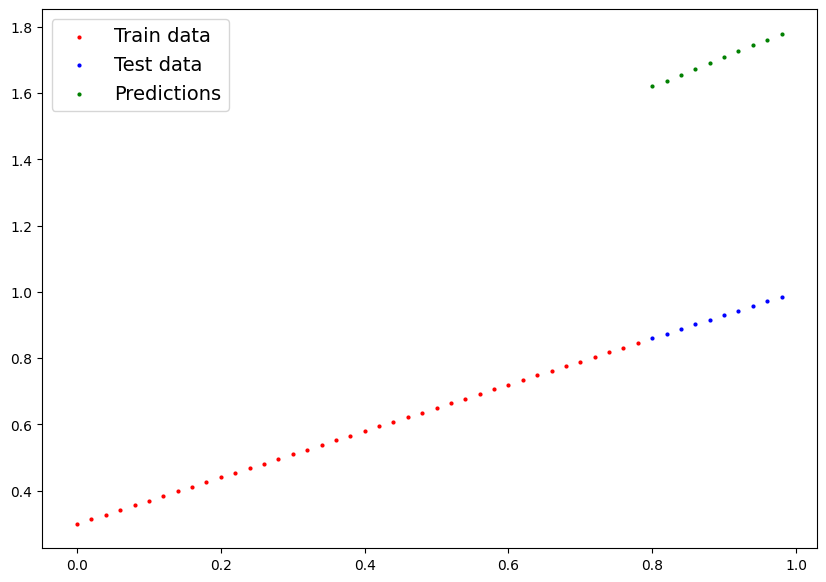

In [ ]:
plot_predictions(predictions=y_preds)

## Training a model

Training for a model to move an unknown parameters into a better representation of the data.

**Loss functions**

**Optimizer**(Weights and Biases)

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

1. training loop
2. testing loop

In [ ]:
 loss_fn = nn.L1Loss()

 optimizer = torch.optim.SGD(params=model_0.parameters(),
                             lr=0.01)# Stochastic Gradient Descent

### Building a training loop (and testing loop) in PYTORCH

0. Loop throught the data
1. Forward pass (using forward() functions)
2. Calculate loss (compare forward pass predictions to ground truth labels)
3. OPtimizer zero grad
4. Loss backwards (**Back propagation**)
5. Optimizer step (use the optimiser to adjust the model parameters - **Gradient decent**)


In [ ]:
with torch.inference_mode():
  list(model_0.parameters())

In [ ]:
epochs = 400 #epochs are hyper parameter

#Tracking experiments

epoch_count = []
loss_values = []
test_loss_values = []

### Training
#Loop through the data
for epoch in range(epochs):
  #setting the model to training mode
  model_0.train() #sets all parameters that requires gradient to 0

  #1. Forward pass
  Y_pred = model_0(X_train)

  #2. Calculate loss
  loss = loss_fn(Y_pred, Y_train) # It should be predictions first and then train/absolute/targets labels

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #Testing the model
  model_0.eval() # turns off settings in the model not required for testing
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, Y_test)

  if epoch % 100 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.6860889196395874 | Test Loss: 0.7637526988983154
OrderedDict([('weights', tensor([0.8784])), ('bias', tensor([0.9050]))])
Epoch: 100 | Loss: 0.007095950655639172 | Test Loss: 0.00754010071977973
OrderedDict([('weights', tensor([0.6938])), ('bias', tensor([0.2980]))])
Epoch: 200 | Loss: 0.007095950655639172 | Test Loss: 0.00754010071977973
OrderedDict([('weights', tensor([0.6938])), ('bias', tensor([0.2980]))])
Epoch: 300 | Loss: 0.007095950655639172 | Test Loss: 0.00754010071977973
OrderedDict([('weights', tensor([0.6938])), ('bias', tensor([0.2980]))])


In [ ]:
weight, bias

(0.7, 0.3)

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)
  print(y_preds_new)

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])


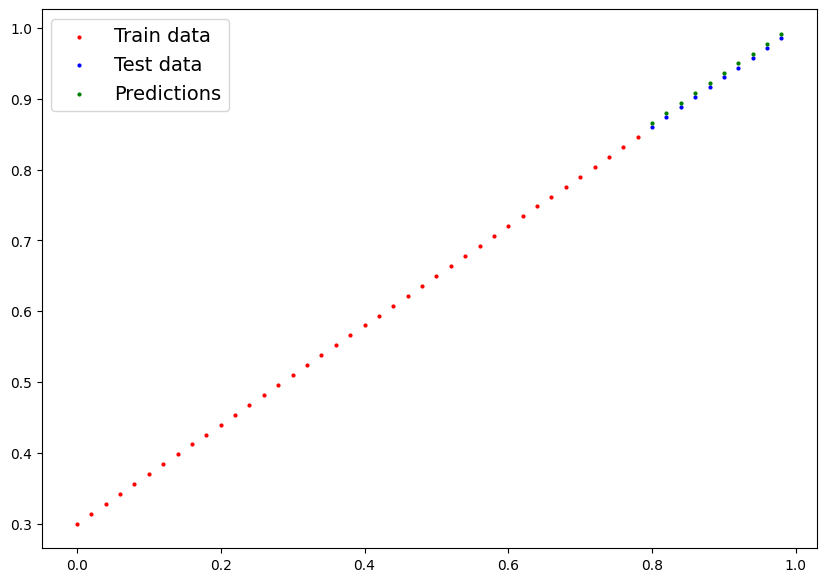

In [ ]:
plot_predictions(predictions=y_preds_new)

In [ ]:
epoch_count, test_loss_values, loss_values

([0, 100, 200, 300],
 [tensor(0.7638), tensor(0.0075), tensor(0.0075), tensor(0.0075)],
 [tensor(0.6861, grad_fn=<MeanBackward0>),
  tensor(0.0071, grad_fn=<MeanBackward0>),
  tensor(0.0071, grad_fn=<MeanBackward0>),
  tensor(0.0071, grad_fn=<MeanBackward0>)])

In [ ]:
import numpy as np

loss_values_plt = np.array(torch.tensor(loss_values).numpy())
test_loss_values_plt = np.array(torch.tensor(test_loss_values).numpy())

In [ ]:
loss_values_plt, test_loss_values_plt

(array([0.6860889 , 0.00709595, 0.00709595, 0.00709595], dtype=float32),
 array([0.7637527, 0.0075401, 0.0075401, 0.0075401], dtype=float32))

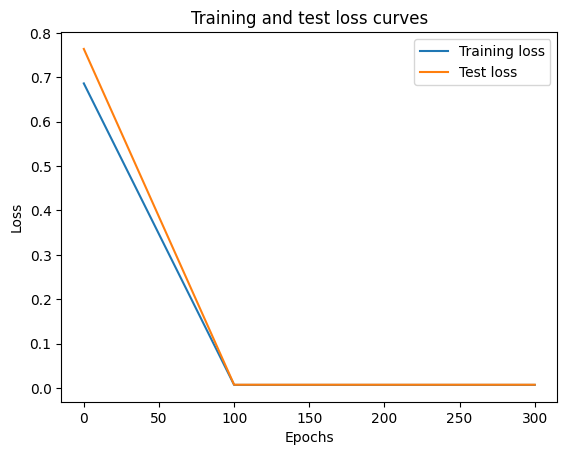

In [ ]:
plt.plot(epoch_count, loss_values_plt, label="Training loss")
plt.plot(epoch_count, test_loss_values_plt, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

## Chapter 51: Saving the model

There are 3 main methods to save and load
1. 'torch.save()' -- Saving it in python pickle format
2. 'torch.load()'
3. 'torch.nn.Module.load_state_dict()' --model saves the state dict

In [ ]:
from pathlib import Path

#1. create model dir.
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. Save the model state_dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Apr  5 00:20 01_pytorch_workflow_model_0.pth


In [ ]:
#Loading a pytorch model

loaded_model_0 = LinearRegressionModel()

#Load the saved state_dict
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [ ]:
## make some predictions

loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
  print(loaded_model_preds)

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])


In [ ]:
## compare the previous
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])